# Fitting a function to histogram

In this exercise, your task is to fit a relativistic Breit-Wigner distribution function to a peak in invariant mass histogram. From the parameters of the fitted function, it is then possible to determine the mass and lifetime of the particle that the peak represents.

The relativistic Breit-Wigner function is a common distribution function used in the field of high-energy physics. The probability density function writes as

$$
f(E) = \frac{K}{(E^2-M^2)^2 + M^2 \Gamma^2},
$$

where $E$ is the energy, $M$ the maximum of the distribution (equals to the mass of the particle that is detected in the resonance), $\Gamma$ the full width at half maximum (FWHM) or the decay width of the particle and $K$ a constant that can be expressed as:

$$
K = \frac{2\sqrt{2}M\Gamma\sqrt{M^2(M^2+\Gamma^2)} }{\pi\sqrt{M^2+\sqrt{M^2(M^2+\Gamma^2)}}}
$$

If we also want to include the background events to the fit, we must add additional parameters $a$, $b$ and $A$ to the distribution function. Together with the background event parameters, the probability density function becomes

$$
f(E) = aE+b+A\frac{K}{(E^2-M^2)^2 + M^2 \Gamma^2},
$$

The decay width $\Gamma$ and the lifetime $\tau$ of the particle detected in the resonance are related in the following way:

$$
\Gamma \equiv \frac{\hbar}{\tau},
$$

where $\hbar$ is the reduced Planck's constant. This relation is based on the uncertainty principle $\Delta E \Delta t \gtrsim \hbar $, which states that we cannot know exactly both the energy and lifetime of a particle. Therefore, the shorter the lifetime, the greater the uncertainty in energy.

# Exercise

You will use dataset **"DoubleMuRun2011A.csv"**. Your task is to plot the invariant masses of the events in the dataset, fit the relativistic Breit-Wigner function to a peak and determine the mass and lifetime of the particle. Here is a summary of what you should do:

1. Plot the invariant mass histogram from the data in **"DoubleMuRun2011A.csv"** using 100 bins. The invariant masses are already calculated and are saved to a column called "M".
1. Plot invariant mass histogram on the range 70 - 110 GeV.
1. Define a function **bin_centers(bins_edges)** that takes a list of evenly spaced bin edges as arguments and returns the bin centers.
1. Define a function **breitwigner(E, gamma, M, a, b, A)** that returns the value of the relativistic Breit-Wigner probability density function.
1. Fit Breit-Wigner -function to the peak using bin centers as xdata and bin heights as ydata.

## Part 1 - Invariant mass, bin centers and Breit-Wigner distribution

Plot the invariant mass histogram from data in file "DoubleMuRun2011A.csv". Use 100 bins. The invariant masses are already calculated and are saved to a column called "M".

<br>

$\color{red}{\text{Write the code below}}$

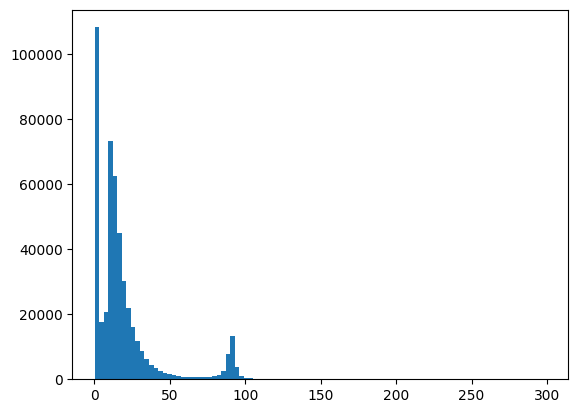

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

nbins = 100
data = pd.read_csv("DoubleMuRun2011A.csv")
plt.hist(data.M, bins=nbins)
plt.show()

As you can probably see, the histogram is quite hard to read. However, we can see that there are some interesting peaks that we might want to look more closely at. Focus on invariant mass range of 70 to 110 GeV. What particle are we looking at? Then plot invariant mass histogram on that range. Again, use 100 bins. Save the bin edges and bin heights to variables (when plotting histogram, write "hist, bins, patches = plt.hist(...)" to get bin heights saved to "hist" and bin edges to "bins").

<br>

$\color{red}{\text{Write the code below}}$

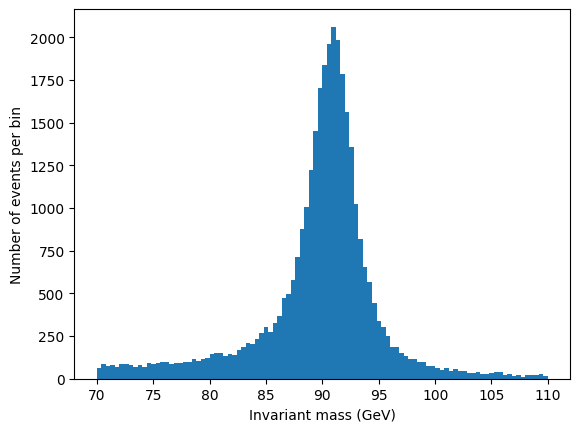

In [2]:
lower_limit = 70
upper_limit = 110

plt.figure()
hist, bin_edges, patches = plt.hist(data.M, bins=nbins, range=(lower_limit,upper_limit))
plt.xlabel('Invariant mass (GeV)')
plt.ylabel('Number of events per bin')
plt.show()

Now you should be able to see a single peak. Your task is to fit a Breit-Wigner distribution function to this peak. For more accurate results, we want to fit the function using bin centers as our xdata and bin heights as our ydata. We got bin heights and bin edges from plt.hist() as return values. Now we just need to transform the bin edges into bin centers.

Write a function **bin_centers(bin_edges)** that takes a list of evenly spaced bin edges as arguments and returns the bin centers. For example, for a list [1, 2, 3, 4, 5], your code should return [1.5, 2.5, 3.5, 4.5].

<br>

$\color{red}{\text{Write the code below}}$


In [3]:
def bin_centers(bin_edges):
    if len(bin_edges) > 1:
        return [0.5 * (bin_edges[i] + bin_edges[i+1]) for i in range(len(bin_edges)-1)]
    else:
        print("At least two bin edges are needed.")

Before we can do the function fitting, we still need to define the Breit-Wigner function.

Write a function **breitwigner(E, gamma, M, a, b, A)** that returns the value of the relativistic Breit-Wigner probability density function. 

<br>

$\color{red}{\text{Write the code below}}$


In [4]:
def breitwigner(E, gamma, M, a, b, A):
    y = np.sqrt(M**2*(M**2+gamma**2))
    K = 2*np.sqrt(2)*M*gamma*y/(np.pi*np.sqrt(M**2+y))
    return a*E+b+A*(K/((E**2-M**2)**2+M**2*gamma**2))

## Part 2 - Fitting Breit-Wigner distribution to histogram

First, use your bin_centers()-function to transform the bin edges to bin centers.

Finally, it is time to fit the distribution function to the histogram. Use **curve_fit()**-function from scipy.optimize module and find the optimal parameters for the Breit-Wigner distribution. Note that you need some initial guess to get any reasonable optimized parameters from curve_fit function. Approximate your initial guesses for $M$ and $\Gamma$ from the histogram. For the background parameters, you can use for example the following guesses: $a=1$, $b=A=100$. You should perform the optimization multiple times by using the optimized coefficients from the previous iteration as your initial guess for the next iteration. By doing so, you will get more accurate results.

<br>

$\color{red}{\text{Write the code below}}$

In [5]:
bins = bin_centers(bin_edges)

accuracy = 1e-5
p0 = [4, 90, 1, 100, 100]
counter = 0
while True: # Loop until desired accuracy
    best, covariance = curve_fit(breitwigner, bins, hist, p0=p0)
    error = max(abs(p0-best))
    if error < accuracy: 
        break
    p0 = best
    counter += 1

print(*best)

4.232654248834835 90.87745547848928 -2.1311883797003466 199.97997198770753 13830.257647030665


Once you have the optimized parameters, plot the fitted function and the initial histogram to confirm that the fit is good. If the function doesn't seem to describe the histogram well, try using different initial guess or more iterations to find optimal parameters. 

Print the parameters and their errors. Errors can be calculated by writing np.sqrt(np.diag(covariance)), where covariance is returned by curve_fit -function.

<br>

$\color{red}{\text{Write the code below}}$

Gamma = 4.233 +/- 0.053
M     = 90.877 +/- 0.016
a     = -2.131 +/- 0.272
b     = 199.980 +/- 24.776
A     = 13830.258 +/- 143.999


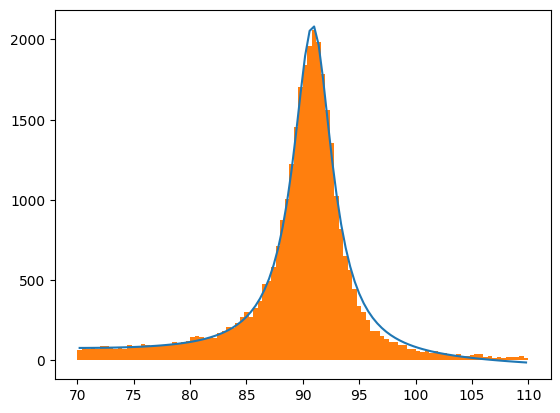

In [6]:
plt.plot(bins, breitwigner(np.array(bins), *best))
plt.hist(data.M, bins=nbins, range=(lower_limit,upper_limit))
errors = np.sqrt(np.diag(covariance))
param_strings = ["Gamma","M","a","b","A"]
for i in range(len(best)):
    print("{2:5} = {0:.3f} +/- {1:.3f}".format(best[i],errors[i],param_strings[i]))
plt.show()

Now that you have a function that represents the data well, you can use it to estimate the lifetime of the particle. Can you also determine the mass of the particle with uncertainties? 

<br>

$\color{red}{\text{Write the code below}}$


In [7]:
def lifetime(decayWidth):
    hbar = 6.582119569e-16/1e9 # GeV*s
    return hbar/decayWidth

gamma = best[0]
errgamma = errors[0]
tau = lifetime(gamma)
tauminus = lifetime(gamma-errgamma)
tauplus = lifetime(gamma+errgamma)
error = max(tauminus-tau,tau-tauplus)
print("tau = {0:.5E} s +/- {1:.5E} s".format(tau,error))
print("M = {0:.3f} GeV +/- {1:.3f} GeV".format(best[1],errors[1]))

tau = 1.55508E-25 s +/- 1.95864E-27 s
M = 90.877 GeV +/- 0.016 GeV
